# GIS595 StoryMap

### Leaflet Storymap with CSVs

We are now going to start working on our Leaflet Storymap by building several `pandas dataframes` which we can save as a CSVs.

Our storymap will have a scrolling narrative that follows points along our map. You will learn how to add images, audio and video files, and different map backgrounds. 

We will build an in-class storymap to looking at different colleges and universities in Wake County.

In [236]:
import pandas as pd
import geopandas as gpd
import os
import folium
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [237]:
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'NR491 Leaflet Storymap Demo', '']
subtitle = ['Storymap Subtitle', \
    "Hurricane Florence Flood Extent on Spotted Turtle Nesting Habitat<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/ncsu_logo.jpg', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Add your name','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/handsondataviz/leaflet-storymaps-with-google-sheets',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

In [238]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options_Template.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)


In [239]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options_Template.csv', index_col=0)
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,NR491 Leaflet Storymap Demo,NaN
Storymap Subtitle,Hurricane Florence Flood Extent on Spotted Tur...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,NaN,NaN


In [240]:
# we will index to the specific entry we want to edit using df[col][row] indexing.
# we read in the df with the first column as our index to make this easier for ourselves

# here, we are changing the background color of our narative bar
options_df['Customize']['Narrative Background Color'] = 'lightgray'

options_df

C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\2497308199.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  options_df['Customize']['Narrative Background Color'] = 'lightgray'


,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,NR491 Leaflet Storymap Demo,NaN
Storymap Subtitle,Hurricane Florence Flood Extent on Spotted Tur...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,lightgray,NaN


In [241]:
# Next, make edits to the Author Name and Author Github Repo Link so it has your information
options_df['Customize']['Author Name'] = 'Emma Wilson'
options_df['Customize']['Author GitHub Repo Link'] = 'https://github.com/emmawilson217'
options_df['Customize']['Storymap Title'] = 'GIS595 Final Project'

# save your options df as Options.csv
options_df.to_csv('./csv/Options.csv')

C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\1786770342.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  options_df['Customize']['Author Name'] = 'Emma Wilson'
C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\1786770342.py:3: FutureWa

### Chapters

We will add content to our map by creating a `Chapters.csv`.

Now, let's read in some of our spatial data.

In [242]:
# Read in spatial data:
wake_boundary = gpd.read_file("./data/wake_boundary.geojson")
woody_sampled = gpd.read_file("./data/woody_sampled_polygon.geojson")
emergent_sampled = gpd.read_file("./data/emergent_sampled_polygon.geojson")
subwatersheds_selected = gpd.read_file("./data/subwatersheds_selected.geojson")
subwatersheds_with_impervious = gpd.read_file("./data/subwatersheds_with_impervious.geojson")
spotted_range_map = gpd.read_file('./data/spotted_range_map.geojson')

Now, let's make our `Chapters.csv` with specific column headers (**do not change the headers, they work with the background Leaflet code**) and a row for each of our chapters.

In [243]:
header = ['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link', 'Description', \
    'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency', \
    'GeoJSON Overlay', 'GeoJSON Feature Properties']

In [244]:
col_names = ['Wake County, NC as an Urban Hub', 'Synergistic Impacts of Urbanization and Climate on Turtle Nests', 'Hurricane Florence',
             'Mapping Pre-Flood Conditions', 'Exploring Flood Extent', 'Impervious Surface Across Wake County', 'Wetland Flooding', 
             'Emergent Wetland Correlation', 'Woody Wetland Correlation', 'Main Takeaways', 'Literature Cited']

In [245]:
# Create a new Chapters.csv

# opens a csv file in write mode
# the with statement makes sure the file closes properly when we're done
with open('./csv/Chapters.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(['The Spotted Turtle'])

    for name in col_names:
        writer.writerow([name])

In [246]:
chapter_df = pd.read_csv('./csv/Chapters.csv')
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,The Spotted Turtle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Wake County, NC as an Urban Hub",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Synergistic Impacts of Urbanization and Climat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hurricane Florence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mapping Pre-Flood Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Exploring Flood Extent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Impervious Surface Across Wake County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Wetland Flooding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Emergent Wetland Correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Woody Wetland Correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
chapter_df.columns

Index(['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link',
       'Description', 'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude',
       'Longitude', 'Overlay', 'Overlay Transparency', 'GeoJSON Overlay',
       'GeoJSON Feature Properties'],
      dtype='object')

In [248]:
header

['Chapter',
 'Media Link',
 'Media Credit',
 'Media Credit Link',
 'Description',
 'Zoom',
 'Marker',
 'Marker Color',
 'Location',
 'Latitude',
 'Longitude',
 'Overlay',
 'Overlay Transparency',
 'GeoJSON Overlay',
 'GeoJSON Feature Properties']

In [249]:
col_names

['Wake County, NC as an Urban Hub',
 'Synergistic Impacts of Urbanization and Climate on Turtle Nests',
 'Hurricane Florence',
 'Mapping Pre-Flood Conditions',
 'Exploring Flood Extent',
 'Impervious Surface Across Wake County',
 'Wetland Flooding',
 'Emergent Wetland Correlation',
 'Woody Wetland Correlation',
 'Main Takeaways',
 'Literature Cited']

In [250]:
# The Spotted Turtle
# path to the image used for this chapter
chapter_df.loc[[0], ['Media Link']] = 'https://www.youtube.com/embed/GVaZmhSoAkg?si=jt6Abgbzf3piWnrk'
# Name of image source
chapter_df.loc[[0], ['Media Credit']] = 'Youtube: Wondering About Nature'
chapter_df.loc[[0], ["Media Credit Link"]] = "https://www.youtube.com/@Wondering_About_Nature"
# Narrative description
chapter_df.loc[[0], ['Description']] = 'The spotted turtle (<i>Clemmys guttata</i>) is a small \
    semi-aquatic turtle in the Emydidae family. \
    Spotted turtles are typically found in marshy meadows, vernal pools, swamps, ditches, small ponds, \
    and streams, where bodies of water are typically clean and shallow with soft bottoms and ample aquatic \
    vegetation (Beane, 2010; Ernst and Lovich, 2009). Although regarded as a wetland generalist, they exhibit \
    a strong association with shallow vegetated ephemeral wetland systems characterized by dynamic hydrology. \
    Globally, spotted turtles are considered endangered according to the International Union \
    for Conservation of Nature (IUCN) Red List of Threatened Species, with a fifty percent estimated \
    reduction in overall population size (van Dijk, 2011), and it is a species of greatest conservation \
    need in all states where it occurs (Willey et al., 2022). The range of the spotted turtle extends from \
    southern Ontario and Maine, down the Atlantic Coastal Plain and Piedmont to northern Florida, \
    and westward through Ontario, New York, Pennsylvania, central Ohio, northern Indiana, \
    Michigan, and northeastern Illinois (Ernst and Lovich, 2009). Only portions of the range for the conterminous U.S. \
    are pictured here (<i>see orange marker</i>).'

# Wake County
chapter_df.loc[1, "Media Link"] = "media/2024_wake_co_nlcd.png"
chapter_df.loc[1, "Media Credit"] = "Image Source: USGS - 2024 Annual NLCD"
chapter_df.loc[1, "Media Credit Link"] = "https://www.usgs.gov/centers/eros/science/annual-national-land-cover-database"
chapter_df.loc[1, "Description"] = 'Wake County, NC is a rapidly growing urban hub. Located in the Piedmont ecoregion of \
                                    North Carolina, 1,232,444 people live in the county in over 500,000 housing units (U.S. Census Bureau, n.d.).'


# Urbanization and Climate
chapter_df.loc[2, "Media Link"] = "media/wake_impervious_surface.png"
chapter_df.loc[2, "Media Credit"] = "Image Source: USGS - 2024 Annual NLCD"
chapter_df.loc[2, "Media Credit Link"] = "https://www.usgs.gov/centers/eros/science/annual-nlcd-fractional-impervious-surface"
chapter_df.loc[2, "Description"] = 'Wake County experienced a cumulative population change between 2020 and 2024 of 9.1% U.S. Census Bureau, Population Division, 2025), \
                                    compared to the national cumulative change of only 2.6% (U.S. Census Bureau, Population Division, 2024). \
                                    This increase in population brings extensive changes to the landscape, including an increase in impervious surface cover, \
                                    illustrated here. Urbanization has been attributed to increased surface runoff (Shrestha et al., 2021), and synergistic \
                                    impacts between climate change and urbanization have the potential to work synergistically to increase the severity \
                                    of urban flooding (Huong and Pathirana, 2013). There is some evidence that flooding is associated with the \
                                    loss of nesting area (Norris et al. 2018), direct mortality (Pignati et al. 2013), and developmental stress (Cordero et al. 2017) \
                                    in freshwater turtles. Despite these impacts, <b>the effects of flooding on spotted turtle nests has been \
                                    relatively unexplored</b>, despite the fact that spotted turtles typically nest in and around the periphery of wetlands (Willey et al. 2022), \
                                    areas that likely experience substantial flooding during times of intense rainfall.'
                                    
                                    
# Hurricane Florence
chapter_df.loc[3, "Media Link"] = "https://www.youtube.com/embed/s2dhfnI1ENg?si=jdwdMojun8SsQ-23"
chapter_df.loc[3, "Media Credit"] = "Image Source: Youtube - CBS Mornings"
chapter_df.loc[3, "Media Credit Link"] = "https://www.youtube.com/@CBSMornings"
chapter_df.loc[3, 'Location'] = 'Wilmington, NC'
chapter_df.loc[3, 'Latitude'] = 34.2104
chapter_df.loc[3, 'Longitude'] = -77.8868
chapter_df.loc[3, 'Marker Color'] = 'Pink'
chapter_df.loc[3, "Description"] = 'To better understand the impacts of flooding on areas that could contain spotted turtle nests \
                                    we investigated one of the most impactful storms to hit North Carolina. Hurricane Florence made \
                                    landfall in Wilmington, North Carolina (<i>see marker</i>) on September 14th, 2018 as a category 1 \
                                    storm. Hurricane Florence brought the highest rainfall for any storm to hit the eastern coast of \
                                    the United States, where Wake County, NC received between 8-10 inches of rainfall (WRAL, 2018). \
                                    Using this extreme storm event as a case study, we were seeking to <b>(1) determine if extreme \
                                    flooding events impact areas that could be used by spotted turtles for nesting. (2) If so, is \
                                    flooding linked to impervious surface cover, and (3) how do trends compare between woody and \
                                    emergent wetlands as identified through NLCD?</b>'

# Mapping Pre-Flood Conditions
chapter_df.loc[4, "Media Link"] = "media/ndwi_img.png"
chapter_df.loc[4, "Media Credit"] = "Emma M. Wilson - Analysis Derived from Sentinel-2 (2018) Imagery via GEE"
chapter_df.loc[4, "Media Credit Link"] = "https://developers.google.com/earth-engine/datasets/catalog/sentinel-2"
chapter_df.loc[4, "Description"] = 'We first documented pre-existing bodies of water using the normalized \
                                    difference water index (NDWI), which ranges from -1 to 1, where higher values are indicative of \
                                    greater surface water probability (pictured here). This allowed us to determine baseline surface water extent \
                                    prior to Hurricane Florence. We only considered 50 of the largest woody and emergent (100 total) wetlands, areas that may \
                                    support spotted turtle nests, in Wake County, NC. All wetlands were buffered by 359 m to capture flooding impacts on nests \
                                    that may occur outside of the designated NLCD wetland boundary. Green polygons denote wetlands considered \
                                    in this analysis (selected potential nesting areas).'

# Exploring Flood Extent
chapter_df.loc[5, "Media Link"] = "media/flood_extent.png"
chapter_df.loc[5, "Media Credit"] = "Emma M. Wilson - Flood Extent Layer Accessed via NC OneMap"
chapter_df.loc[5, "Media Credit Link"] = "https://www.nconemap.gov/datasets/hurricane-florence-flood-extent-across-the-piedmont-and-coastal-plain-of-north-carolina/explore"
chapter_df.loc[5, "Description"] = 'In order to determine flood extent, we used an existing dataset that documented flood extent for Hurricane Florence \
                                    for the Coastal Plain and Piemdont of North Carolina. <i>Flooded areas</i> were defined as new water pixels \
                                    present in the flood data but <i>not</i> in the pre-flood NDWI data. We only considered areas identified as \
                                    potential spotted turtle nesting habitat (buffered NLCD wetland polygons)'


# Impervious Surface Across Wake County
chapter_df.loc[6, "Media Link"] = "media/impervious_surface_all_subwatersheds.png"
chapter_df.loc[6, "Media Credit"] = "Emma M. Wilson"
chapter_df.loc[6, "Description"] = 'Next, to document whether flood extent was connected to impervious surface cover, \
                                    we identified all subwatersheds (HUC-12 regions) that fall within Wake County, NC. \
                                    The mean percent impervious surface was calculated for all subwatersheds. \
                                    Areas in darker red denote higher mean impervious surface, while blue depicts a lower \
                                    mean impervious surface percent (greys represent intermediate values).'

# Wetland Flooding
chapter_df.loc[7, "Media Link"] = "media/proportion_flooded_by_wetland_type.png"
chapter_df.loc[7, "Media Credit"] = "Emma M. Wilson"
chapter_df.loc[7, "Description"] = 'We quantified the extent of flooding by calculating the proportion of area that flooded \
                                    in woody and emergent wetlands. Wetlands in darker red denote more flooded area, while blue depicts a lower \
                                    proportion of flooded area (greys represent intermediate values).'

# Emergent Wetland Correlation
chapter_df.loc[8, "Media Link"] = "media/emergent_wetlands_correlation.png"
chapter_df.loc[8, "Media Credit"] = "Emma M. Wilson"
chapter_df.loc[8, "Description"] = 'To determine if flooding was associated with impervious surface, we calculated a correlation metric ranging from -1 to 1, \
                                    where the sign (-/+) indicates the directionality and the value represents the magnitude of the association. \
                                    The Pearson correlation coefficient between the proportion of flooded area and mean impervious surface was <b>-0.07</b>.'

# Woody Wetland Correlation
chapter_df.loc[9, "Media Link"] = "media/woody_wetlands_correlation.png"
chapter_df.loc[9, "Media Credit"] = "Emma M. Wilson"
chapter_df.loc[9, "Description"] = 'The correlation was also explored specifically for woody wetlands. The Pearson correlation coefficient \
                                    between mean impervious surface and proportion of flooded area for woody wetlands was <b>0.34</b>.'

# Main Takeaways
chapter_df.loc[10, "Media Link"] = "media/spotted_turtle.jpg"
chapter_df.loc[10, "Media Credit"] = "Emma M. Wilson"
chapter_df.loc[10, "Description"] = "We can see that the area around potential <b>spotted turtle nesting habitat is impacted by flooding</b> from \
                                    extreme storm events like Hurricane Florence. While woody wetlands were more common in the county, there was \
                                    significant difference in the proportion of flooded area between woody and emergent wetlands. While there was no, \
                                    correlation between emergent wetland flooding and mean subwatershed impervious surface, <b>woody wetlands were \
                                    weakly positively correlated with flooding<b>, suggesting that as impervious surface increases flooding may increase \
                                    as well. This analysis highlights the need to better understand nest site selection, behavioral adaptations, and \
                                    nest flood tolerance for spotted turtle conservation in a highly urban area."

# Literature Cited
chapter_df.loc[11, "Description"] = (
    "<p>Beane, J. C. (2010). <i>Amphibians & reptiles of the Carolinas and Virginia</i> "
    "(2nd ed., rev. updated). University of North Carolina Press.</p>"

    "<p>Cordero, G. A., Karnatz, M. L., Svendsen, J. C., & Gangloff, E. J. (2017). "
    "Effects of low-oxygen conditions on embryo growth in the painted turtle, <i>Chrysemys picta</i>. "
    "<i>Integrative Zoology, 12</i>(2), 148–156. https://doi.org/10.1111/1749-4877.12206</p>"

    "<p>Ernst, C. H., & Lovich, J. E. (2009). <i>Turtles of the United States and Canada</i>. "
    "JHU Press.</p>"

    "<p>Huong, H. T. L., & Pathirana, A. (2013). Urbanization and climate change impacts on future urban flooding "
    "in Can Tho city, Vietnam. <i>Hydrology and Earth System Sciences, 17</i>(1), 379. "
    "https://doi.org/10.5194/hess-17-379-2013</p>"

    "<p>Norris, D., Michalski, F., & Gibbs, J. P. (2018). Beyond harm’s reach? Submersion of river turtle nesting "
    "areas and implications for restoration actions after Amazon hydropower development. <i>PeerJ</i>. "
    "https://doi.org/10.7717/peerj.4228</p>"

    "<p>Pignati, M. T., Fernandes, L. F., Miorando, P. S., Ferreira, P. D., & Pezzuti, J. C. B. (n.d.). Nesting site "
    "and hatching success of <i>Podocnemis unifilis</i> (Testudines: Podocnemididae) in a floodplain area in Lower "
    "Amazon River, Pará, Brazil. <i>South American Journal of Herpetology</i>. Retrieved October 22, 2025, from "
    "https://bioone.org/journals/south-american-journal-of-herpetology/volume-8/issue-3/SAJH-D-13-00006.1/"
    "Nesting-Site-and-Hatching-Success-of-Podocnemis-unifilis-Testudines/10.2994/SAJH-D-13-00006.1.full</p>"

    "<p>Shrestha, S., Cui, S., Xu, L., Wang, L., Manandhar, B., & Ding, S. (2021). Impact of land use change due to "
    "urbanisation on surface runoff using GIS-based SCS–CN method: A case study of Xiamen City, China. "
    "<i>Land, 10</i>(8), 839. https://doi.org/10.3390/land10080839</p>"

    "<p>U.S. Census Bureau. (n.d.). ACS demographic and housing estimates (American Community Survey, "
    "ACS 1-Year Estimates Data Profiles, Table DP05). Retrieved November 26, 2025, from "
    "https://data.census.gov/table/ACSDP1Y2024.DP05</p>"

    "<p>U.S. Census Bureau. (n.d.). Occupancy status (American Community Survey, ACS 1-Year Estimates Detailed "
    "Tables, Table B25002). Retrieved November 26, 2025, from "
    "https://data.census.gov/table/ACSDT1Y2024.B25002</p>"

    "<p>U.S. Census Bureau, Population Division. (2024). <i>Annual and cumulative estimates of resident population "
    "change for the United States, regions, states, District of Columbia, and Puerto Rico and region and state "
    "rankings: April 1, 2020 to July 1, 2024 (NST-EST2024-CHG)</i>. "
    "https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-total.html</p>"

    "<p>U.S. Census Bureau, Population Division. (2025). <i>Annual and cumulative estimates of resident population "
    "change for counties in North Carolina and county rankings: April 1, 2020 to July 1, 2024 (CO-EST2024-CHG-37)</i>. "
    "https://www.census.gov/data/datasets/time-series/demo/popest/2020s-counties-total.html</p>"

    "<p>van Dijk, P. P. (2011). <i>Clemmys guttata</i>. <i>The IUCN Red List of Threatened Species 2011</i>: "
    "e.T4968A97411228. http://dx.doi.org/10.2305/IUCN.UK.2011-1.RLTS.T4968A11103766.en</p>"

    "<p>Willey, L. L., Parren, M. K., & Jones, M. T. (Eds.). (2022). <i>Status assessment and conservation plan for "
    "spotted turtles in the eastern United States</i> (pp. 285). Technical report prepared for the Virginia "
    "Department of Wildlife Resources and the U.S. Fish and Wildlife Service. "
    "https://www.northeastturtles.org/uploads/3/0/4/3/30433006/clgu_conservation_plan_10_13_22.pdf</p>"

    "<p>WRAL. (2018, September 17). Record rainfall: Some saw almost 3 feet from Florence. <i>WRAL.com</i>. "
    "https://www.wral.com/florence-causes-record-rainfall-/17850750/</p>"
)

C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\3633570025.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'https://www.youtube.com/embed/GVaZmhSoAkg?si=jt6Abgbzf3piWnrk' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chapter_df.loc[[0], ['Media Link']] = 'https://www.youtube.com/embed/GVaZmhSoAkg?si=jt6Abgbzf3piWnrk'
C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\3633570025.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Youtube: Wondering About Nature' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chapter_df.loc[[0], ['Media Credit']] = 'Youtube: Wondering About Nature'
C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\3633570025.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error

In [251]:
# Check our work
# chapter_df.head()

# Save
chapter_df.to_csv('./csv/Chapters.csv')

In [252]:
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,The Spotted Turtle,https://www.youtube.com/embed/GVaZmhSoAkg?si=j...,Youtube: Wondering About Nature,https://www.youtube.com/@Wondering_About_Nature,The spotted turtle (<i>Clemmys guttata</i>) is...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Wake County, NC as an Urban Hub",media/2024_wake_co_nlcd.png,Image Source: USGS - 2024 Annual NLCD,https://www.usgs.gov/centers/eros/science/annu...,"Wake County, NC is a rapidly growing urban hub...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Synergistic Impacts of Urbanization and Climat...,media/wake_impervious_surface.png,Image Source: USGS - 2024 Annual NLCD,https://www.usgs.gov/centers/eros/science/annu...,Wake County experienced a cumulative populatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hurricane Florence,https://www.youtube.com/embed/s2dhfnI1ENg?si=j...,Image Source: Youtube - CBS Mornings,https://www.youtube.com/@CBSMornings,To better understand the impacts of flooding o...,NaN,NaN,Pink,"Wilmington, NC",34.2104,-77.8868,NaN,NaN,NaN,NaN
4,Mapping Pre-Flood Conditions,media/ndwi_img.png,Emma M. Wilson - Analysis Derived from Sentine...,https://developers.google.com/earth-engine/dat...,We first documented pre-existing bodies of wat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Exploring Flood Extent,media/flood_extent.png,Emma M. Wilson - Flood Extent Layer Accessed v...,https://www.nconemap.gov/datasets/hurricane-fl...,"In order to determine flood extent, we used an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Impervious Surface Across Wake County,media/impervious_surface_all_subwatersheds.png,Emma M. Wilson,NaN,"Next, to document whether flood extent was con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Wetland Flooding,media/proportion_flooded_by_wetland_type.png,Emma M. Wilson,NaN,We quantified the extent of flooding by calcul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Emergent Wetland Correlation,media/emergent_wetlands_correlation.png,Emma M. Wilson,NaN,To determine if flooding was associated with i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Woody Wetland Correlation,media/woody_wetlands_correlation.png,Emma M. Wilson,NaN,The correlation was also explored specifically...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
# Add GeoJSON layers
chapter_df.loc[0, "GeoJSON Overlay"] = "geojson/spotted_range_map.geojson"
chapter_df.loc[0, 'Location'] = 'Spotted Turtle Range'
chapter_df.loc[0, 'Latitude'] = 39.9526
chapter_df.loc[0, 'Longitude'] = -75.1652
chapter_df.loc[0, 'Zoom'] = 5

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[0, "GeoJSON Feature Properties"] = "fillColor:purple;color:black"

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\1408219040.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'geojson/spotted_range_map.geojson' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chapter_df.loc[0, "GeoJSON Overlay"] = "geojson/spotted_range_map.geojson"
C:\Users\emmaw\AppData\Local\Temp\ipykernel_6028\1408219040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'fillColor:purple;color:black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chapter_df.loc[0, "GeoJSON Feature Properties"] = "fillColor:purple;color:black"


In [254]:
chapter_df.loc[1, "GeoJSON Overlay"] = "geojson/wake_boundary.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[1, "GeoJSON Feature Properties"] = "fillColor:pink;color:black"
chapter_df.loc[1, 'Location'] = 'Wake County, NC'
chapter_df.loc[1, 'Latitude'] = 35.8032
chapter_df.loc[1, 'Longitude'] = -78.5661
chapter_df.loc[1, 'Zoom'] = 9

chapter_df.loc[2, "GeoJSON Overlay"] = "geojson/wake_boundary.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[2, "GeoJSON Feature Properties"] = "fillColor:pink;color:black"
chapter_df.loc[2, 'Location'] = 'Wake County, NC'
chapter_df.loc[2, 'Latitude'] = 35.8032
chapter_df.loc[2, 'Longitude'] = -78.5661
chapter_df.loc[2, 'Zoom'] = 9

chapter_df.loc[5, "GeoJSON Overlay"] = "geojson/wake_boundary.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[5, "GeoJSON Feature Properties"] = "fillColor:pink;color:black"
chapter_df.loc[5, 'Location'] = 'Wake County, NC'
chapter_df.loc[5, 'Latitude'] = 35.8032
chapter_df.loc[5, 'Longitude'] = -78.5661
chapter_df.loc[5, 'Zoom'] = 9

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

In [255]:
chapter_df.loc[4, "GeoJSON Overlay"] = "geojson/nesting_combined.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[4, "GeoJSON Feature Properties"] = "fillColor:green;color:black"
chapter_df.loc[4, 'Location'] = 'Wetlands Sampled in Wake County, NC'
chapter_df.loc[4, 'Latitude'] = 35.8032
chapter_df.loc[4, 'Longitude'] = -78.5661
chapter_df.loc[4, 'Zoom'] = 10

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

Index(['mean_impervious', 'geometry'], dtype='object')


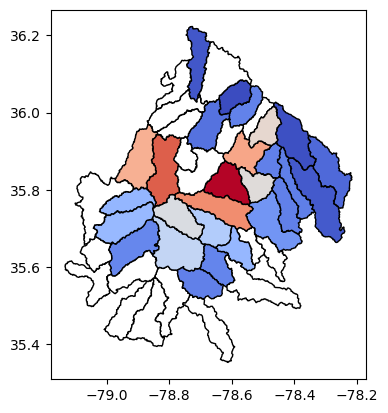

In [256]:
# Read in the data
subwatersheds_impervious_path = './geojson/subwatersheds_with_impervious.geojson'
subwatersheds_impervious = gpd.read_file(subwatersheds_impervious_path)
subwatersheds_impervious.to_crs(4326,inplace=True)
print(subwatersheds_impervious.columns)

# Normalize the values to 0–1 for colormap
norm = mcolors.Normalize(
    vmin=subwatersheds_impervious['mean_impervious'].min(),
    vmax=subwatersheds_impervious['mean_impervious'].max()
)

# Choose a colormap
cmap = plt.cm.coolwarm

# Apply the colormap, handle missing data
subwatersheds_impervious['fillColor'] = subwatersheds_impervious['mean_impervious'].apply(
    lambda x: mcolors.to_hex(cmap(norm(x))) if pd.notna(x) else '#FFFFFF'  # White for missing
)

# Plot with black edge for all polygons
subwatersheds_impervious.plot(
    color=subwatersheds_impervious['fillColor'],
    edgecolor='black'
)

plt.show()

# save the geojson
subwatersheds_impervious.to_file('./geojson/subwatersheds_impervious_storymap.geojson', driver='GeoJSON')
chapter_df.loc[6, "GeoJSON Overlay"] = "geojson/subwatersheds_impervious_storymap.geojson"

chapter_df.loc[6, 'Location'] = 'Sampled Subwatersheds in Wake County, NC'
chapter_df.loc[6, 'Latitude'] = 35.8032
chapter_df.loc[6, 'Longitude'] = -78.5661
chapter_df.loc[6, 'Zoom'] = 10

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

Index(['WetlandType', 'polygon_index', 'flooded_pixel_count_pre_flood',
       'flooded_pixel_count_post_flood', 'flooded_pixel_difference',
       'percentage_change_inundation', 'subwatershed_id', 'mean_impervious',
       'area_m2', 'prop_inundated', 'geometry'],
      dtype='object')


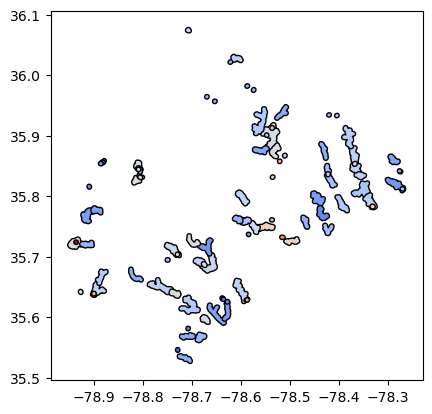

In [257]:
# Read in the data
flood_with_impervious_path = './geojson/flood_with_impervious.geojson'
flood_with_impervious = gpd.read_file(flood_with_impervious_path)
flood_with_impervious.to_crs(4326,inplace=True)
print(flood_with_impervious.columns)

# Normalize the values to 0–1 for colormap
norm = mcolors.Normalize(
    vmin=flood_with_impervious['prop_inundated'].min(),
    vmax=flood_with_impervious['prop_inundated'].max()
)

# Choose a colormap
cmap = plt.cm.coolwarm

# Apply the colormap, handle missing data
flood_with_impervious['fillColor'] = flood_with_impervious['prop_inundated'].apply(
    lambda x: mcolors.to_hex(cmap(norm(x))) if pd.notna(x) else '#FFFFFF'  # White for missing
)

# Plot with black edge for all polygons
flood_with_impervious.plot(
    color=flood_with_impervious['fillColor'],
    edgecolor='black'
)

plt.show()

# save the geojson
flood_with_impervious.to_file('./geojson/flood_with_impervious_storymap.geojson', driver='GeoJSON')
chapter_df.loc[7, "GeoJSON Overlay"] = "geojson/flood_with_impervious_storymap.geojson"

chapter_df.loc[7, 'Location'] = 'Proportion of Wetland Flooded in Wake County, NC'
chapter_df.loc[7, 'Latitude'] = 35.8032
chapter_df.loc[7, 'Longitude'] = -78.5661
chapter_df.loc[7, 'Zoom'] = 10

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

In [258]:
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,The Spotted Turtle,https://www.youtube.com/embed/GVaZmhSoAkg?si=j...,Youtube: Wondering About Nature,https://www.youtube.com/@Wondering_About_Nature,The spotted turtle (<i>Clemmys guttata</i>) is...,5.0,NaN,NaN,Spotted Turtle Range,39.9526,-75.1652,NaN,NaN,geojson/spotted_range_map.geojson,fillColor:purple;color:black
1,"Wake County, NC as an Urban Hub",media/2024_wake_co_nlcd.png,Image Source: USGS - 2024 Annual NLCD,https://www.usgs.gov/centers/eros/science/annu...,"Wake County, NC is a rapidly growing urban hub...",9.0,NaN,NaN,"Wake County, NC",35.8032,-78.5661,NaN,NaN,geojson/wake_boundary.geojson,fillColor:pink;color:black
2,Synergistic Impacts of Urbanization and Climat...,media/wake_impervious_surface.png,Image Source: USGS - 2024 Annual NLCD,https://www.usgs.gov/centers/eros/science/annu...,Wake County experienced a cumulative populatio...,9.0,NaN,NaN,"Wake County, NC",35.8032,-78.5661,NaN,NaN,geojson/wake_boundary.geojson,fillColor:pink;color:black
3,Hurricane Florence,https://www.youtube.com/embed/s2dhfnI1ENg?si=j...,Image Source: Youtube - CBS Mornings,https://www.youtube.com/@CBSMornings,To better understand the impacts of flooding o...,NaN,NaN,Pink,"Wilmington, NC",34.2104,-77.8868,NaN,NaN,NaN,NaN
4,Mapping Pre-Flood Conditions,media/ndwi_img.png,Emma M. Wilson - Analysis Derived from Sentine...,https://developers.google.com/earth-engine/dat...,We first documented pre-existing bodies of wat...,10.0,NaN,NaN,"Wetlands Sampled in Wake County, NC",35.8032,-78.5661,NaN,NaN,geojson/nesting_combined.geojson,fillColor:green;color:black
5,Exploring Flood Extent,media/flood_extent.png,Emma M. Wilson - Flood Extent Layer Accessed v...,https://www.nconemap.gov/datasets/hurricane-fl...,"In order to determine flood extent, we used an...",9.0,NaN,NaN,"Wake County, NC",35.8032,-78.5661,NaN,NaN,geojson/wake_boundary.geojson,fillColor:pink;color:black
6,Impervious Surface Across Wake County,media/impervious_surface_all_subwatersheds.png,Emma M. Wilson,NaN,"Next, to document whether flood extent was con...",10.0,NaN,NaN,"Sampled Subwatersheds in Wake County, NC",35.8032,-78.5661,NaN,NaN,geojson/subwatersheds_impervious_storymap.geojson,NaN
7,Wetland Flooding,media/proportion_flooded_by_wetland_type.png,Emma M. Wilson,NaN,We quantified the extent of flooding by calcul...,10.0,NaN,NaN,"Proportion of Wetland Flooded in Wake County, NC",35.8032,-78.5661,NaN,NaN,geojson/flood_with_impervious_storymap.geojson,NaN
8,Emergent Wetland Correlation,media/emergent_wetlands_correlation.png,Emma M. Wilson,NaN,To determine if flooding was associated with i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Woody Wetland Correlation,media/woody_wetlands_correlation.png,Emma M. Wilson,NaN,The correlation was also explored specifically...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Storymap Literature Cited ###

Beane, J. C. (2010). Amphibians & reptiles of the Carolinas and Virginia (2nd ed., rev. updated). University of North Carolina Press.

Cordero, G. A., Karnatz, M. L., Svendsen, J. C., & Gangloff, E. J. (2017). Effects of low-oxygen conditions on embryo growth in the painted turtle, Chrysemys picta. Integrative Zoology, 12(2), 148–156. https://doi.org/10.1111/1749-4877.12206

Ernst, C. H., & Lovich, J. E. (2009). Turtles of the United States and Canada. JHU Press.

Huong, H. T. L., & Pathirana, A. (2013). Urbanization and climate change impacts on future urban flooding in Can Tho city, Vietnam. Hydrology and Earth System Sciences, 17(1), 379. https://doi.org/10.5194/hess-17-379-2013

Norris, D., Michalski, F., & Gibbs, J. P. (2018). Beyond harm’s reach? Submersion of river turtle nesting areas and implications for restoration actions after Amazon hydropower development. PeerJ. https://doi.org/10.7717/peerj.4228

Pignati, M. T., Fernandes, L. F., Miorando, P. S., Ferreira, P. D., & Pezzuti, J. C. B. (n.d.). Nesting site and hatching success of Podocnemis unifilis (Testudines: Podocnemididae) in a floodplain area in Lower Amazon River, Pará, Brazil. South American Journal of Herpetology. Retrieved October 22, 2025, from https://bioone.org/journals/south-american-journal-of-herpetology/volume-8/issue-3/SAJH-D-13-00006.1/Nesting-Site-and-Hatching-Success-of-Podocnemis-unifilis-Testudines/10.2994/SAJH-D-13-00006.1.full

Shrestha, S., Cui, S., Xu, L., Wang, L., Manandhar, B., & Ding, S. (2021). Impact of land use change due to urbanisation on surface runoff using GIS-based SCS–CN method: A case study of Xiamen City, China. Land, 10(8), 839. https://doi.org/10.3390/land10080839

U.S. Census Bureau. (n.d.). ACS demographic and housing estimates (American Community Survey, ACS 1-Year Estimates Data Profiles, Table DP05). Retrieved November 26, 2025, from https://data.census.gov/table/ACSDP1Y2024.DP05?t=Populations+and+People&g=050XX00US37183&y=2024

U.S. Census Bureau. (n.d.). Occupancy status (American Community Survey, ACS 1-Year Estimates Detailed Tables, Table B25002). Retrieved November 26, 2025, from https://data.census.gov/table/ACSDT1Y2024.B25002?t=Housing+Units&g=050XX00US37183&y=2024

U.S. Census Bureau, Population Division. (2024). Annual and cumulative estimates of resident population change for the United States, regions, states, District of Columbia, and Puerto Rico and region and state rankings: April 1, 2020 to July 1, 2024 (NST-EST2024-CHG). https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-total.html

U.S. Census Bureau, Population Division. (2025). Annual and cumulative estimates of resident population change for counties in North Carolina and county rankings: April 1, 2020 to July 1, 2024 (CO-EST2024-CHG-37). https://www.census.gov/data/datasets/time-series/demo/popest/2020s-counties-total.html

van Dijk, P. P. (2011). Clemmys guttata. The IUCN Red List of Threatened Species 2011: e.T4968A97411228. http://dx.doi.org/10.2305/IUCN.UK.2011-1.RLTS.T4968A11103766.en

Willey, L. L., Parren, M. K., & Jones, M. T. (Eds.). (2022). Status assessment and conservation plan for spotted turtles in the eastern United States (pp. 285). Technical report prepared for the Virginia Department of Wildlife Resources and the U.S. Fish and Wildlife Service. https://www.northeastturtles.org/uploads/3/0/4/3/30433006/clgu_conservation_plan_10_13_22.pdf

WRAL. (2018, September 17). Record rainfall: Some saw almost 3 feet from Florence. WRAL.com. https://www.wral.com/florence-causes-record-rainfall-/17850750/